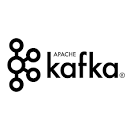

# Ejercicios con Kafka

Este laboratorio usara las tecnologías descritas en los materiales del curso sobre Kafka. Haremos ejercicios para la creación de topics, productores y consumidores.

## Durante esta PEC vamos a cubrir:

* *Ejercicio 1:* Creación de un topic (1 PUNTO)
* *Ejercicio 2:* Hola mundo en Kafka: creación de un productor que escriba en el topic previamente creado y de un consumidor que escriba y muestre los mensajes (1,5 PUNTOS)
* *Ejercicio 3:* Primeros pasos con las particiones. Crearemos un productor que envíe los números pares a una partición y los impares a otra y después los mostraremos con un consumidor. (1,5 PUNTOS)
* *Ejercicio 4:* Entendiendo los offsets (2 PUNTOS)


> Como referencia a todos los detalles de los métodos que se usan en esta práctica se puede consultar, además de la documentación de la asignatura, la documentación oficial de kafka:
> * [Kafka Documentation](https://kafka.apache.org/documentation/)


## Ejercicio 1: Creación de un topic de Kafka (1 PUNTO)

Para empezar, vamos a crear un topic, que será el que utilizaremos en los siguientes ejercicios. El topic tiene que tener las siguientes características. 

- Nombre: El usuario de la UOC del alumno seguido de la palabra Topic (por ejemplo: garguelloTopic)
- El topic debe tener una sola partición.
- El factor de replicación tiene que ser 1

Deberéis rellenar los huecos indicados con FILL IN


In [1]:
!kafka-topics --create --zookeeper localhost:2181/kafka --topic xcastanoaTopic --partitions 1 --replication-factor 1

24/11/16 19:54:40 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/16 19:54:41 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
24/11/16 19:54:41 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Al ejecutar el comando, al final del log, debemos ver que se ha creado el topic, pero vamos a comprobarlo:

In [3]:
!kafka-topics --list --zookeeper localhost:2181/kafka

24/11/17 06:44:26 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/17 06:44:26 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
24/11/17 06:44:26 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

## Ejercicio 2: Hola mundo en Kafka. (1,5 PUNTOS)

En este ejercicio vamos a crear un productor que envíe al topic generado previamente un array generado a partir de valores aleatorios de una distribución normal con media 0 y varianza 1.

Posteriormente crearemos un consumidor que lea el topic y haremos un histograma en el que el que pintaremos los valores recibidos.



In [4]:
from kafka import KafkaProducer
import numpy as np

#Definimos el productor
producer = KafkaProducer(bootstrap_servers='Cloudera02:9092')

#Definimos un array con valores aleatorios de una distribución normal 0,1. Mirad la función np.random.normal
x = np.random.normal(size = 1000)

#generamos un bucle que envie los elementos de array anterior uno a uno a nuestro topic
for i in range (1, 1000): 
    producer.send('xcastanoaTopic', value=bytes(str(x[i]),'utf-8'))

Debemos crear un consumidor que lea el valor del mensaje que hemos producido anteriormente y lo pinte en una gráfica, pintaremos un histograma de los datos de la distribución normal que hemos generado. El consumidor, si no lo controlamos, se queda escuchando "para siempre" a la espera de nuevos mensajes, para que esto no suceda utilizamos el parámetro consumer_timeout_ms

Text(0, 0.5, 'Frecuencia')

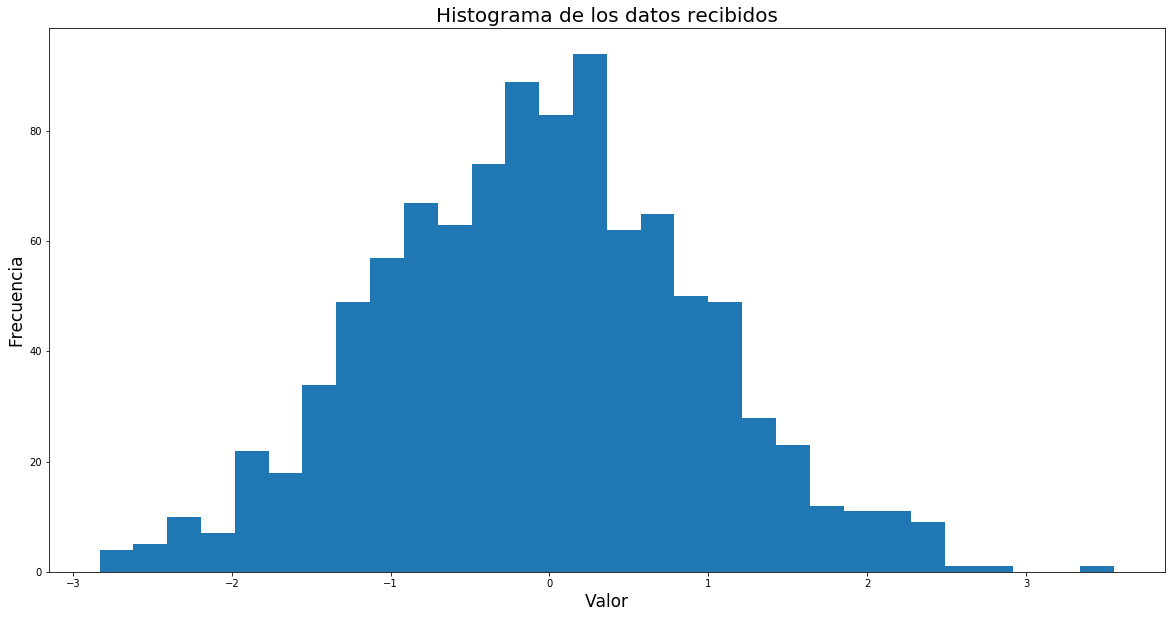

In [10]:
%matplotlib inline
from kafka import KafkaConsumer
import time
import matplotlib.pyplot as plt
import numpy as np

#Creamos la figura para despues pintar el scatter plot
fig, ax1 = plt.subplots(figsize=(20,10))

#Definimos una lista vacia en la que luego almacenaremos los valores
data = []
#Definimos el consumidor
consumer = KafkaConsumer('xcastanoaTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest',consumer_timeout_ms = 10000)

#Consumimos los mensajes y los almacenamos en una lista
for message in consumer:
        data.append(float(message.value.decode('utf-8')))
        
# Pintamos el histograma
ax1.hist(data, bins = 30)
ax1.set_title('Histograma de los datos recibidos', fontsize=20)
ax1.set_xlabel('Valor', fontsize=17)
ax1.set_ylabel('Frecuencia', fontsize=17)


## Ejercicio 3: Aprendiendo a usar particiones (1.5 PUNTOS)

En este ejercicio vamos a trabajar con las particiones de un topic. La primera parte del ejercicio son dos preguntas teóricas sobre las particiones

**¿Cuál es la diferencia entre partición y factor de replicación?**

Son dos cosas bien diferenciables, por un lado, el factor de replicación es el número de veces que una misma partición de un tópico se encuentra replicada. En segundo lugar, una partición de un tópico es un fragmentp del tópico entero. De modo que dentro de un bróker en contaremos varias particiones de varios tópicos, algunas de las cuáles pueden estar replicadas en otros bróker (todas ellas). Cabe destacar que para cada partición de un topic podremos encontrar una que es la líder (la que recibe los cambios de los datos de los productores y las lecturas de los followers) y el resto que serán "followers" y estarán replicadas en un broker a las que les llegarán la información desde la lider y una de ellas tomará la posición de lider si el bróker de la líder o la misma partición lider cae y deja de estar disponible.  

**¿Cuál es el principal objetivo del particionamiento de los topics?**

El objetivo del particionamiento tiene que ver con el hecho de que, si el tópico está fraccionado en diferentes brókers, se podrán realizar tantas operaciones de escritura desde los productores y tantas operaciones de lectura desde los grupos de consumidores de ése tópic cómo fragmentaciones tengamos de los tópic. Por lo tanto, la fragmentación es la que permite la escalabilidad horizontal. Con más brókers podremos tener más fragmentaciones de cada tópico y más operaciones de lectura y/o escritura para un tópíc dado.

En este ejercicio vamos a necesitar un topic particionado, si recordáis en el primer ejercicio creamos un topic con una unica partición, por lo que ahora vamos a crear un topic que tener las siguientes características. 

- Nombre: El usuario de la UOC del alumno seguido de la palabra Topic (por ejemplo: garguelloTopic). Antes tendréis que borrarlo, ya que lo hemos creado en los ejercicios anteriores con otra configuración
- El topic debe tener 2 particiones
- El factor de replicación tiene que ser 1

Deberéis rellenar los huecos indicados con \<FILL IN\>

In [5]:
#Borramos el topic creado en el ejercicio 1
!kafka-topics --zookeeper localhost:2181/kafka --delete --topic xcastanoaTopic 

24/11/17 06:48:22 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/17 06:48:22 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
24/11/17 06:48:22 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

In [6]:
#Creamos otra vez el topis con las especificaciones del enunciado
!kafka-topics --create --zookeeper localhost:2181/kafka --topic xcastanoaTopic --partitions 2 --replication-factor 1


24/11/17 06:57:59 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/17 06:57:59 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
24/11/17 06:57:59 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Vamos a verificar que el topic se ha creado correctamente, para ello vamos a utilizar el parámetro --describe

In [8]:
!kafka-topics --describe --zookeeper localhost:2181/kafka --topic xcastanoaTopic

24/11/17 07:06:57 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/17 07:06:58 INFO zookeeper.ZooKeeperClient: [ZooKeeperClient] Initializing a new session to localhost:2181/kafka.
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:zookeeper.version=3.4.5-cdh6.2.0--1, built on 03/14/2019 06:11 GMT
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:host.name=Cloudera01
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:java.version=1.8.0_181
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:java.vendor=Oracle Corporation
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:java.home=/usr/lib/jvm/java-8-oracle-cloudera/jre
24/11/17 07:06:58 INFO zookeeper.ZooKeeper: Client environment:java.class.path=/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/activation-1.1.1.jar:/opt/cloudera/parcels/CDH-6.2.0-1.cdh6.2.0.p0.967373/bin/../lib/kafka/bin/../libs/

Si la creación se ha realizado correctamente, veremos nuestro topic con dos particiones, la 0 y la 1.

Ahora vamos a crear un productor que a partir de la lista de los 80 primeros números naturales, envíe los pares a la partición 0 y los impares a la 1.

In [35]:
from kafka import KafkaProducer
import numpy as np

#Definimos el productor
producer = KafkaProducer(bootstrap_servers='Cloudera02:9092')

#bucle que enviará los números pares a la partición 0 y los impares a la 1
for i in range (1, 80): 
    if i % 2 == 0:
        producer.send('xcastanoaTopic', value=bytes(str(i), 'utf-8'), partition=0)
    else:
        producer.send('xcastanoaTopic', value=bytes(str(i), 'utf-8'), partition=1)
    


Por último, creamos un consumidor que consuma estos mensajes y los muestre con la función "print". El consumidor, si no lo controlamos, se queda escuchando "para siempre" a la espera de nuevos mensajes, por lo tanto, para evitarlo utilizad el parámetro consumer_timeout_ms

In [12]:
from kafka import KafkaConsumer

#Definimos el consumidor, sin el parametro auto_offset_reset='smallest' sólo leería los nuevos mensajes en el topic no todos los que se crearon.
consumer = KafkaConsumer('xcastanoaTopic',bootstrap_servers='Cloudera02:9092',auto_offset_reset='smallest', consumer_timeout_ms =10000)

#Bucle para imprimir en pantalla todos los mensajes, este bucle al minuto acabará
for message in consumer:
    print(message)

ConsumerRecord(topic='xcastanoaTopic', partition=1, offset=0, timestamp=1731823977538, timestamp_type=0, key=None, value=b'1', checksum=-94121827, serialized_key_size=-1, serialized_value_size=1)
ConsumerRecord(topic='xcastanoaTopic', partition=1, offset=1, timestamp=1731823977539, timestamp_type=0, key=None, value=b'3', checksum=-72361329, serialized_key_size=-1, serialized_value_size=1)
ConsumerRecord(topic='xcastanoaTopic', partition=1, offset=2, timestamp=1731823977539, timestamp_type=0, key=None, value=b'5', checksum=315391930, serialized_key_size=-1, serialized_value_size=1)
ConsumerRecord(topic='xcastanoaTopic', partition=1, offset=3, timestamp=1731823977539, timestamp_type=0, key=None, value=b'7', checksum=-54387050, serialized_key_size=-1, serialized_value_size=1)
ConsumerRecord(topic='xcastanoaTopic', partition=1, offset=4, timestamp=1731823977539, timestamp_type=0, key=None, value=b'9', checksum=460993425, serialized_key_size=-1, serialized_value_size=1)
ConsumerRecord(topic

¿Los mensajes han llegado correctamente a sus particiones? ¿Qué significa la información que muestra el mensaje?

En este caso, sacaremos todo el output en lugar de sólo los valores, los cuales son ConsumerRecords, En ellos podemos ver cómo el consumer ha extraído todos los datos de la partición 1 y seguidamente los de la partición 0, de modo que tan solo están ordenados los números impares en orden ascendente y, una vez ya no hay más números en la prtición de los impares, se devuelven los pares por orden ascendente también. Esto pasa porque se han respectado los offsets pero estos solo existen dentro de cada una de estas por separado. Además podemos observar que no hemos utilizado ninguna key para serializar los valores y el timestamp asociado a los mensages está en milisegundos. 

## Ejercicio 4: Entendiendo los offsets (2 PUNTOS)

En este ejercicio vamos a utilizar el topic creado en el ejercicio anterior para trabajar con los offsets

- Mostrad el offset de las dos particiones del topic creado en el ejercicio anterior (por ejemplo: garguelloTopic)
- Volved a ejecutar el productor del ejercicio anterior ¿qué ocurre con los offsets?
- Cread un consumidor que empiece a leer a partir de un offset especifico (por ejemplo, a partir del 30). 

Deberéis rellenar los huecos indicados con \<FILL IN\>

Mostrad el offset de las dos particiones de topic creado en el ejercicio anterior

In [36]:
from kafka import SimpleClient
from kafka.protocol.offset import OffsetRequest, OffsetResetStrategy
from kafka.common import OffsetRequestPayload

client = SimpleClient('Cloudera02:9092')

partitions = client.topic_partitions['xcastanoaTopic']

requests = [OffsetRequestPayload('xcastanoaTopic', p, -1, 1) for p in partitions.keys()]

responses = client.send_offset_request(requests)

for r in responses:
    print(r.partition, r.offsets[0])

0 78
1 80


Ejecutad otra vez el **productor** del ejercicio anterior y volved a mirad los offsets. ¿Qué ha pasado con ellos? ¿Han cambiado?

Lo que ha pasado es que se han vuelto a escribir otra vez los mismos números dentro de cada una de las particiones, por lo tanto los offsets resultantes son el doble, de 39 y 40 han pasado a ser 78 y 80. Primera iteración 1 a 39 offset y segunda 40 (incluido) a 78 para la partición 0 de números pares y para la partición 1 los primeros 40 son los offsets de la primera ejecución del producer y los segundos 40, de 41 (inlcuido) a 80 es la segunda escritura de los mismos números pares. 

Cread un consumidor que empiece a leer a partir de un offset especifico (por ejemplo, a partir del 30). 

In [51]:
!kafka-console-consumer --bootstrap-server Cloudera02:9092 --topic xcastanoaTopic --partition 0 --offset 77

24/11/17 09:06:17 INFO utils.Log4jControllerRegistration$: Registered kafka:type=kafka.Log4jController MBean
24/11/17 09:06:17 INFO consumer.ConsumerConfig: ConsumerConfig values: 
	auto.commit.interval.ms = 5000
	auto.offset.reset = latest
	bootstrap.servers = [Cloudera02:9092]
	check.crcs = true
	client.dns.lookup = default
	client.id = 
	connections.max.idle.ms = 540000
	default.api.timeout.ms = 60000
	enable.auto.commit = false
	exclude.internal.topics = true
	fetch.max.bytes = 52428800
	fetch.max.wait.ms = 500
	fetch.min.bytes = 1
	group.id = console-consumer-85777
	heartbeat.interval.ms = 3000
	interceptor.classes = []
	internal.leave.group.on.close = true
	isolation.level = read_uncommitted
	key.deserializer = class org.apache.kafka.common.serialization.ByteArrayDeserializer
	max.partition.fetch.bytes = 1048576
	max.poll.interval.ms = 300000
	max.poll.records = 500
	metadata.max.age.ms = 300000
	metric.reporters = []
	metrics.num.samples = 2
	metrics.recording.level = INFO
	metr